In [1]:
import pandas as pd
import numpy as np

In [10]:
data = pd.read_excel("thals_data.xlsx")
data.head()

,sex,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf,phenotype
0,female,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.0,33.0,309.0,88.5,2.6,0.11,alpha carrier
1,male,10.8,26.6,4.28,62.1,25.3,40.8,19.8,10.3,49.4,43.1,687.0,87.8,2.4,0.90,alpha carrier
2,female,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.0,33.0,309.0,88.5,2.6,0.10,alpha carrier
3,male,14.5,43.5,5.17,84.0,28.0,33.4,12.1,11.9,31.0,50.0,334.0,86.8,2.8,0.30,alpha carrier
4,male,11.5,34.4,5.02,68.7,22.9,33.4,15.7,20.4,67.0,30.0,596.0,86.3,2.4,1.30,alpha carrier


In [13]:
data.phenotype.unique()

array(['alpha carrier', 'normal', 'alpha trait', 'silent carrier'],
      dtype=object)

In [3]:
data.isnull().sum()

sex          0
hb           0
pcv          0
rbc          1
mcv          0
mch          3
mchc         0
rdw          0
wbc          0
neut         0
lymph        0
plt          0
hba          0
hba2         0
hbf          0
phenotype    0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

sex          0
hb           0
pcv          0
rbc          0
mcv          0
mch          0
mchc         0
rdw          0
wbc          0
neut         0
lymph        0
plt          0
hba          0
hba2         0
hbf          0
phenotype    0
dtype: int64

In [14]:
data.sex = [1 if value == "male" else 0 for value in data.sex]
# Define a dictionary to map categories to numerical values
category_mapping = {'alpha carrier': 0, 'silent carrier': 1, 'alpha trait': 2, 'normal': 3}

# Use the map function to apply the mapping to the column
data.phenotype = data.phenotype.map(category_mapping)

In [15]:
data.head()

,sex,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf,phenotype
0,0,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.0,33.0,309.0,88.5,2.6,0.11,0
1,1,10.8,26.6,4.28,62.1,25.3,40.8,19.8,10.3,49.4,43.1,687.0,87.8,2.4,0.90,0
2,0,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.0,33.0,309.0,88.5,2.6,0.10,0
3,1,14.5,43.5,5.17,84.0,28.0,33.4,12.1,11.9,31.0,50.0,334.0,86.8,2.8,0.30,0
4,1,11.5,34.4,5.02,68.7,22.9,33.4,15.7,20.4,67.0,30.0,596.0,86.3,2.4,1.30,0


In [16]:
data.phenotype.unique()

array([0, 3, 2, 1], dtype=int64)

In [17]:
data.sex.unique()

array([0, 1], dtype=int64)

In [21]:
data["sex"] = data['sex'].astype("category", copy = False)
data.sex.info()

<class 'pandas.core.series.Series'>
RangeIndex: 350 entries, 0 to 349
Series name: sex
Non-Null Count  Dtype   
--------------  -----   
350 non-null    category
dtypes: category(1)
memory usage: 606.0 bytes


In [20]:
data["phenotype"] = data['phenotype'].astype("category", copy = False)
data.phenotype.info()

<class 'pandas.core.series.Series'>
RangeIndex: 350 entries, 0 to 349
Series name: phenotype
Non-Null Count  Dtype   
--------------  -----   
350 non-null    category
dtypes: category(1)
memory usage: 686.0 bytes


<Axes: xlabel='phenotype'>

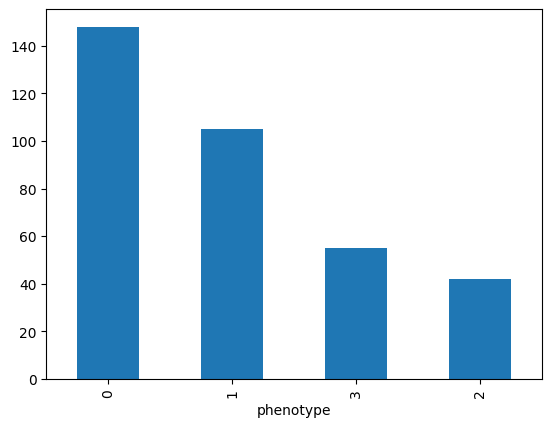

In [23]:
data.phenotype.value_counts().plot(kind = "bar")

In [24]:
X = data.drop(["phenotype"], axis = 1)
y = data["phenotype"]

In [25]:
print(X)

    sex    hb   pcv   rbc   mcv   mch  mchc   rdw   wbc       neut      lymph  \
0     0  10.8  35.2  5.12  68.7  21.2  30.8  13.4   9.6  53.000000  33.000000   
1     1  10.8  26.6  4.28  62.1  25.3  40.8  19.8  10.3  49.400000  43.100000   
2     0  10.8  35.2  5.12  68.7  21.2  30.8  13.4   9.6  53.000000  33.000000   
3     1  14.5  43.5  5.17  84.0  28.0  33.4  12.1  11.9  31.000000  50.000000   
4     1  11.5  34.4  5.02  68.7  22.9  33.4  15.7  20.4  67.000000  30.000000   
..   ..   ...   ...   ...   ...   ...   ...   ...   ...        ...        ...   
345   0  13.1  39.9  4.88  81.8  26.9  32.8  15.6   6.0  66.000000  25.200000   
346   0  10.4  33.3  4.93  67.6  21.1  31.2  14.8   8.9  44.478378  45.527027   
347   1   9.8  29.8  4.75  62.7  19.0  30.4  14.7   7.2  48.234483  41.537931   
348   1  11.2  37.2  5.43  68.5  20.6  30.1  15.1  12.0  13.500000  76.800000   
349   1  14.4  44.5  5.70  78.0  25.3  31.2  15.0   7.2  36.000000  59.000000   

       plt        hba      

In [26]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
345    1
346    1
347    2
348    1
349    1
Name: phenotype, Length: 350, dtype: category
Categories (4, int64): [0, 1, 2, 3]


In [27]:
from sklearn.preprocessing import StandardScaler
# Creating a Scaler Object
scaler = StandardScaler()

# Fitting the Scaler into the Dataset and Data Transformation
X_scaled = scaler.fit_transform(X)

In [28]:
print(X_scaled)

[[-1.07109256 -0.6313393  -0.17688672 ...  0.76425467  0.09386273
  -0.77899739]
 [ 0.93362613 -0.6313393  -2.05531312 ...  0.4803193  -0.52442863
   0.29424281]
 [-1.07109256 -0.6313393  -0.17688672 ...  0.76425467  0.09386273
  -0.7925827 ]
 ...
 [ 0.93362613 -1.21964801 -1.35636376 ... -0.61485996 -0.52442863
   0.56594918]
 [ 0.93362613 -0.39601581  0.25995663 ... -0.03754183  0.0586436
   0.11658864]
 [ 0.93362613  1.48657208  1.85443486 ... -0.03754183  0.0586436
   0.11658864]]


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state=42)

In [31]:
X_train.shape

(280, 15)

In [32]:
X_test.shape

(70, 15)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [34]:
clf = RandomForestClassifier()

In [35]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
print(clf.feature_importances_)

[0.01202608 0.06337234 0.066343   0.06747945 0.08964309 0.09206879
 0.06322795 0.07103929 0.07709864 0.07947578 0.06066356 0.057724
 0.06451952 0.0719382  0.06338031]


In [41]:
y_pred = clf.predict(X_test)
print(y_pred)

[1 3 3 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 2 2 0 1 3 0 0 0 2 1 1 1 1 1 1 2 0 0 2
 0 0 0 0 0 3 0 0 2 0 0 1 3 3 1 1 0 0 0 0 0 1 3 1 1 2 3 0 0 1 0 1 3]


In [39]:
print(y_test)

157    3
341    1
315    1
234    2
155    3
      ..
94     0
181    3
179    3
199    3
326    1
Name: phenotype, Length: 70, dtype: category
Categories (4, int64): [0, 1, 2, 3]


In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.20


In [43]:
print(clf.score(X_test, y_test))

0.2
